In [1]:
!pip install dtreeviz

     -------------------------------------- 91.5/91.5 kB 864.5 kB/s eta 0:00:00


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import dtreeviz
import pickle
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('emails.csv')
df.head(10)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


<AxesSubplot:>

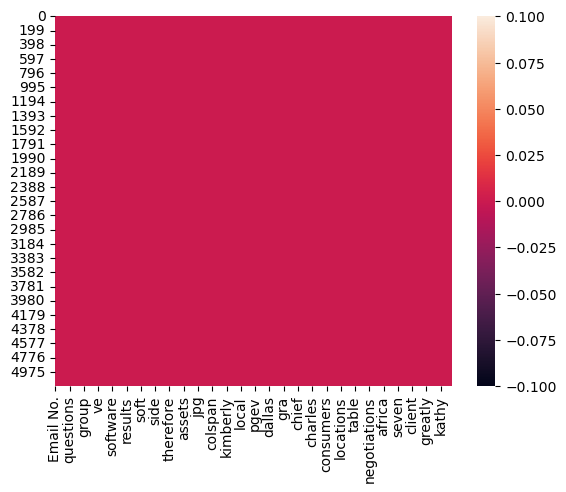

In [8]:
sns.heatmap(df.isnull())

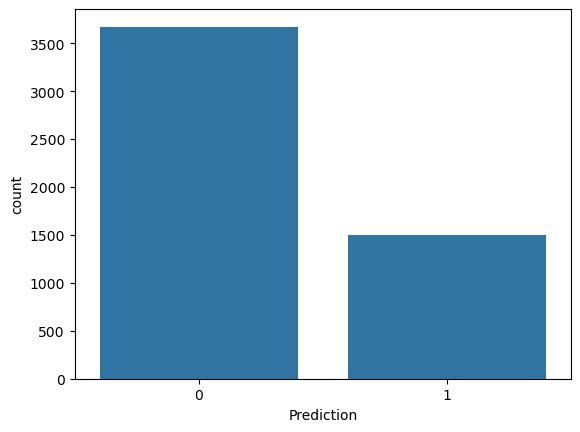

In [9]:
sns.countplot(data=df, x='Prediction', color=sns.color_palette()[0])
plt.show()

In [11]:
df = df.iloc[:, 1:]
df

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [12]:
x = df.iloc[:, :3000]
x

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [13]:
x = x.values
x

array([[ 0,  1,  0, ...,  0,  0,  0],
       [13, 24,  6, ...,  1,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       ...,
       [ 0,  1,  1, ...,  0,  0,  1],
       [ 7,  1,  0, ...,  1,  0,  1],
       [24,  5,  1, ...,  0,  0,  0]], dtype=int64)

In [14]:
y = df.iloc[:, -1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [15]:
y = y.values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Train & Test Splitting the Data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Function to Measure Performance

In [17]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

Logistic Regression

In [18]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9748427672955975
Recall :  0.9810126582278481
Accuracy :  0.9864734299516909
F1 Score :  0.9779179810725552

[[711   8]
 [  6 310]] 



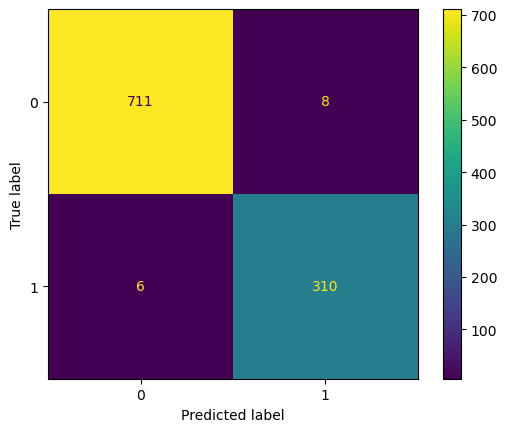

In [20]:
perform(y_pred_lr)

In [21]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       719
           1       0.97      0.98      0.98       316

    accuracy                           0.99      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.99      0.99      0.99      1035



Support Vector Clasifier

In [23]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [24]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.8716216216216216
Recall :  0.40822784810126583
Accuracy :  0.8009661835748793
F1 Score :  0.5560344827586207

[[700  19]
 [187 129]] 



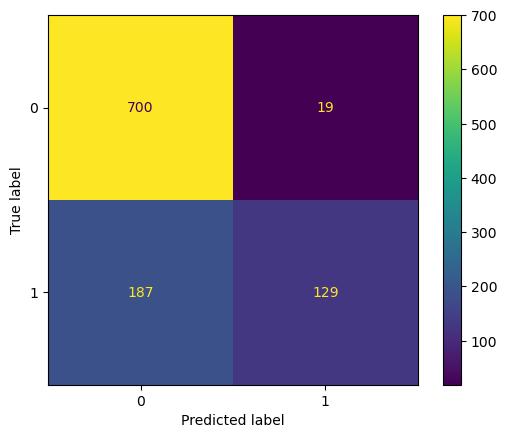

In [25]:
perform(y_pred_svc)

In [26]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       719
           1       0.87      0.41      0.56       316

    accuracy                           0.80      1035
   macro avg       0.83      0.69      0.71      1035
weighted avg       0.81      0.80      0.78      1035



Gaussian Naive Bayes

In [27]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [28]:
y_pred_nb = model_nb.predict(x_test)

Precision :  0.9968354430379747
Recall :  0.9968354430379747
Accuracy :  0.9980676328502416
F1 Score :  0.9968354430379747

[[718   1]
 [  1 315]] 



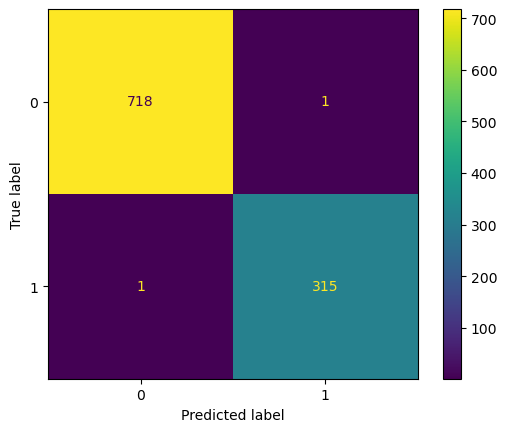

In [29]:
perform(y_pred_nb)

In [30]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       316

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



Multinomial Naive Bayes

In [31]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [32]:
y_pred_mnb = model_mnb.predict(x_test)

Precision :  0.8774373259052924
Recall :  0.9968354430379747
Accuracy :  0.9565217391304348
F1 Score :  0.9333333333333332

[[675  44]
 [  1 315]] 



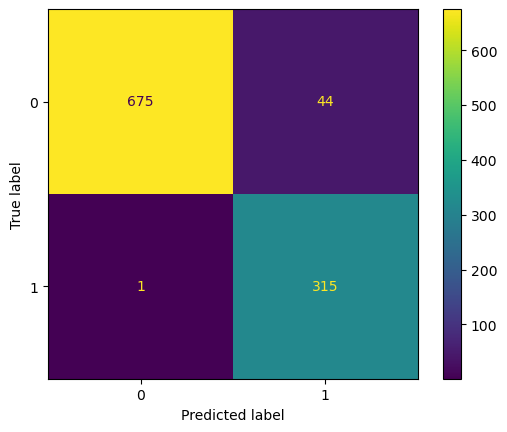

In [33]:
perform(y_pred_mnb)

In [34]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       719
           1       0.88      1.00      0.93       316

    accuracy                           0.96      1035
   macro avg       0.94      0.97      0.95      1035
weighted avg       0.96      0.96      0.96      1035



XGBoost Classifier

In [35]:
xgb = XGBClassifier().fit(x_train, y_train)

In [36]:
y_pred_xgb = xgb.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[719   0]
 [  0 316]] 



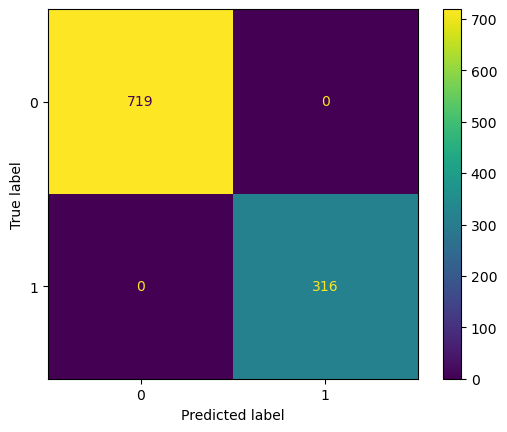

In [37]:
perform(y_pred_xgb)

In [38]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       316

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



ADABoost Classifier

In [39]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [40]:
y_pred_ada = model_ada.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[719   0]
 [  0 316]] 



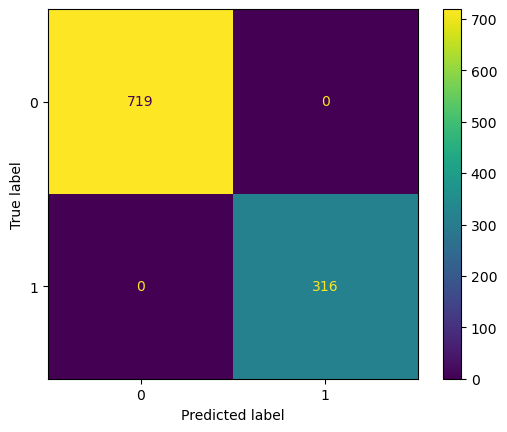

In [41]:
perform(y_pred_ada)

In [42]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       316

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



Decision Tree

In [44]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dt = model_dt.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[719   0]
 [  0 316]] 



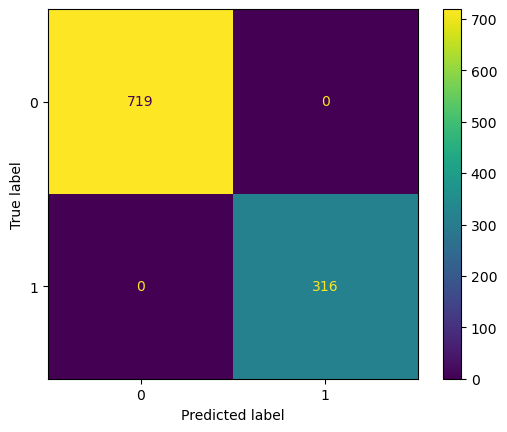

In [46]:
perform(y_pred_dt)

In [47]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       316

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



In [48]:
filename = 'Email_Spam_Detection_DT.h5'
pickle.dump(model_dt, open(filename, 'wb'))

In [49]:
feature_names = df.columns[0:3000]
viz = df.copy()
viz["Prediction"]=viz["Prediction"].values.astype(str)
print(viz.dtypes)
target_names = viz['Prediction'].unique().tolist()

to             int64
ect            int64
and            int64
for            int64
of             int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction    object
Length: 3000, dtype: object


In [50]:
target_names

['0', '1']

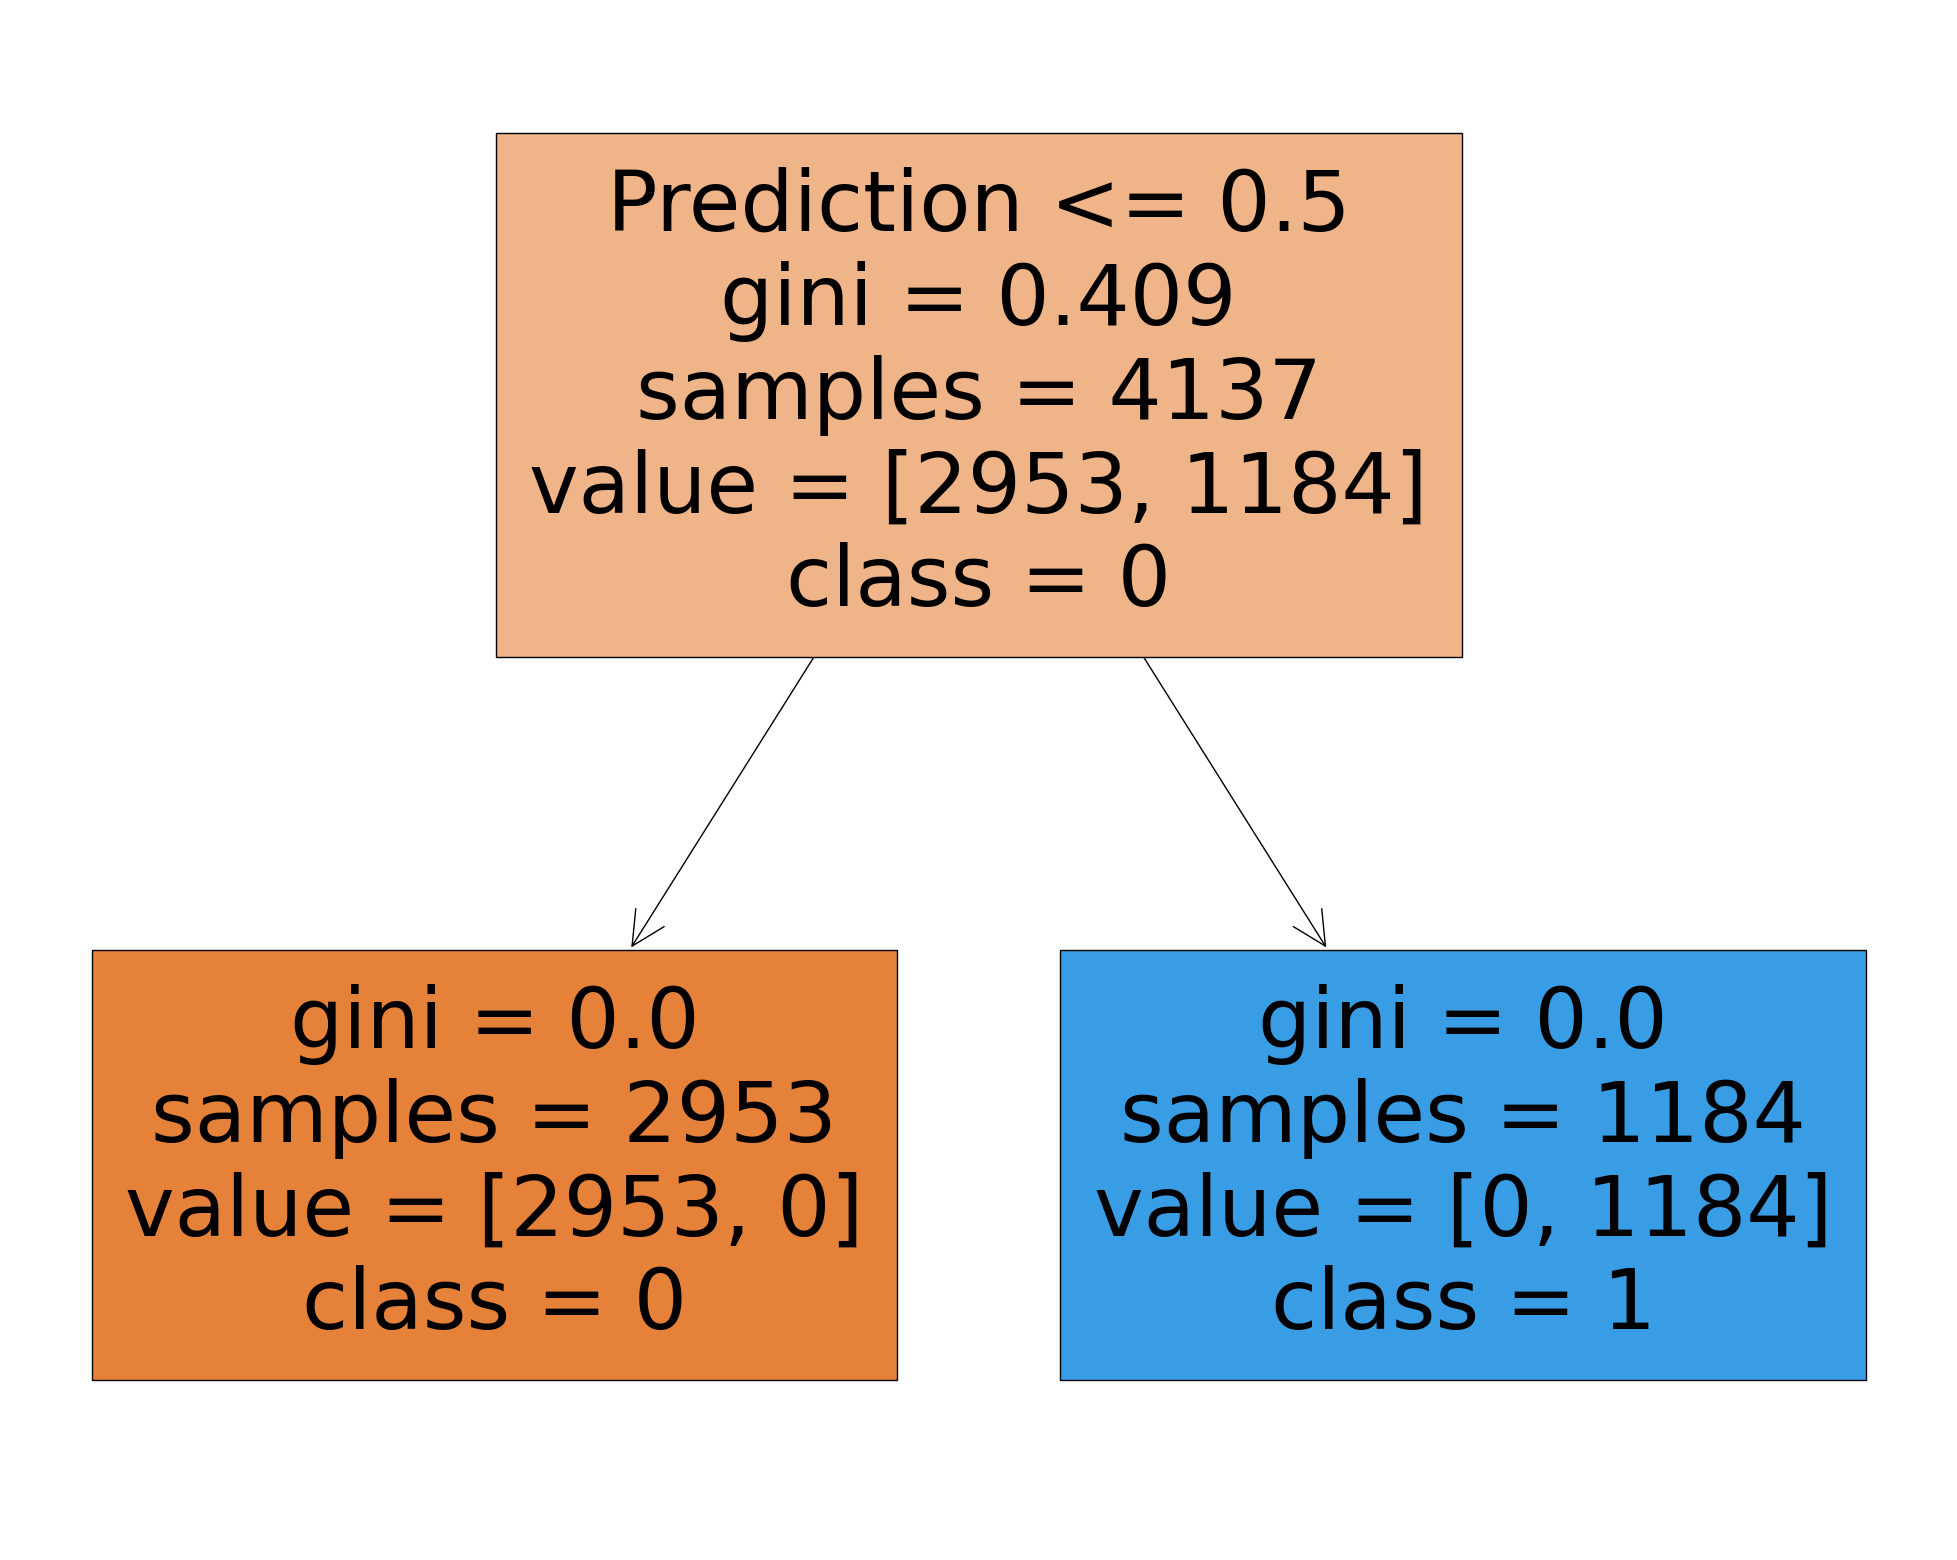

In [51]:
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)
plt.savefig('tree_visualization.png')

Random Forest

In [52]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
y_pred_rf = model_rf.predict(x_test)

Precision :  1.0
Recall :  0.9968354430379747
Accuracy :  0.9990338164251208
F1 Score :  0.9984152139461173

[[719   0]
 [  1 315]] 



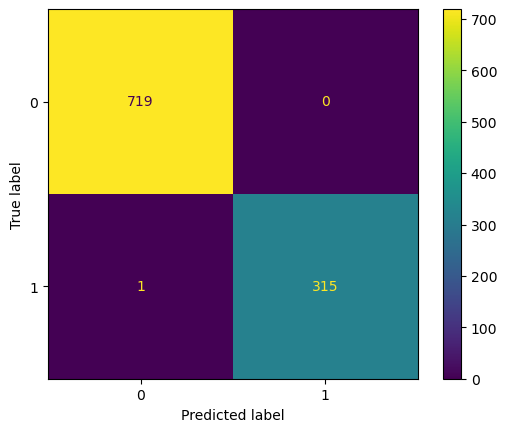

In [54]:
perform(y_pred_rf)

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       316

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035

